#Using EfficientNetB0 for making food 101 ML Model to scan a food

#IMPORT LIBRARIES

This is the libraries which will be needed or not to use in NutriBalance

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras import mixed_precision
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# This codes are to check the version of libraries
print("The numpy version is " + np.__version__)
print("The tensorflow version is " + tf.__version__)
print("The pandas version is " + pd.__version__)

The numpy version is 1.23.5
The tensorflow version is 2.15.0
The pandas version is 1.5.3


##DATA COLLECTING

We use TensorFlow Dataset Food101

In [ ]:
dataset_food101 = tfds.list_builders()
print("food101" in dataset_food101)

True


In [ ]:
#import dataset food101 from Tensorflow Dataset
(train_data, validation_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteE0QYAF/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteE0QYAF/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


This is the figure of train data


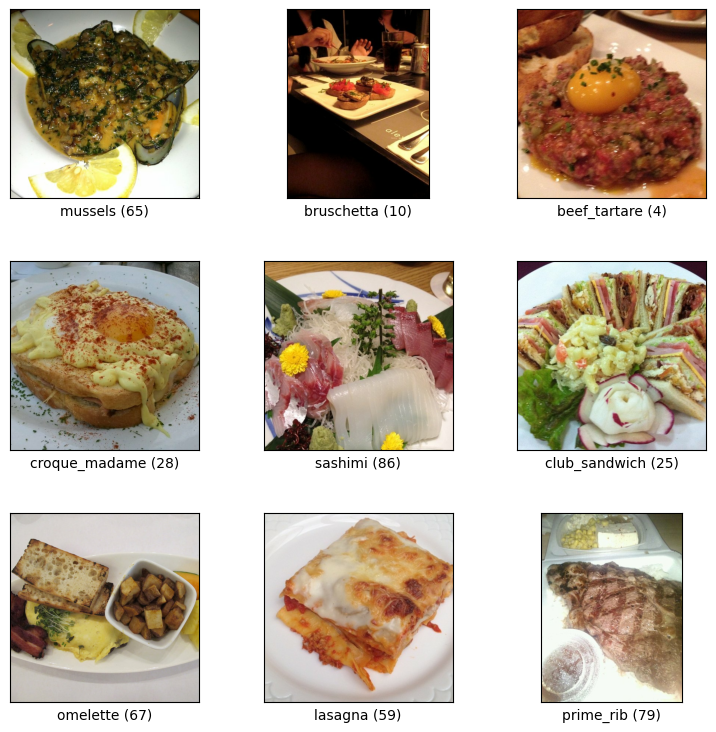

In [ ]:
print('This is the figure of train data')
figure_of_train_data = tfds.show_examples(train_data, ds_info)

This is the figure of validation data


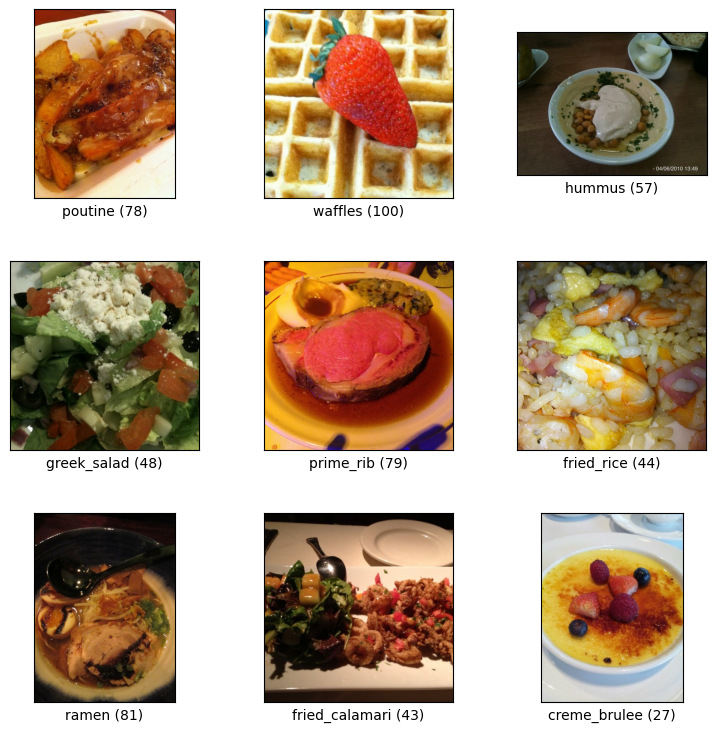

In [ ]:
print('This is the figure of validation data')
figure_of_validation_data = tfds.show_examples(validation_data, ds_info)

In [ ]:
#This is show the features of dictionary
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
#This is the example of class names
class_names = ds_info.features["label"].names
ten_first_classes =  class_names[:10]
ten_second_classes = class_names[10:20]
ten_third_classes = class_names[20:30]
ten_fourth_classes = class_names[30:40]
ten_fifth_classes = class_names[40:50]
ten_sixth_classes = class_names[50:60]
ten_seventh_classes = class_names[60:70]
ten_eigth_classes = class_names[70:80]
ten_ninth_classes = class_names[80:90]
ten_tenth_classes = class_names[90:100]
last_one_classes = class_names[100]
print("This is the class names")
print(ten_first_classes)
print(ten_second_classes)
print(ten_third_classes)
print(ten_fourth_classes)
print(ten_fifth_classes)
print(ten_sixth_classes)
print(ten_seventh_classes)
print(ten_eigth_classes)
print(ten_ninth_classes)
print(ten_tenth_classes)
print(last_one_classes)

This is the class names
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
['bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla']
['chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes']
['deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras']
['french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']
['grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna']
['lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_

In [ ]:
print('taking one example of train data')
train_sample = train_data.take(1)
train_sample

taking one example of train data


<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class: {label}
  Class name: {class_names[label.numpy()]}
  """)


  Image shape: (306, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class: 29
  Class name: cup_cakes
  


In [ ]:
#This is show the numpy array of image
image
#This is show the maximum and minimum value of image
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 305.5, -0.5)

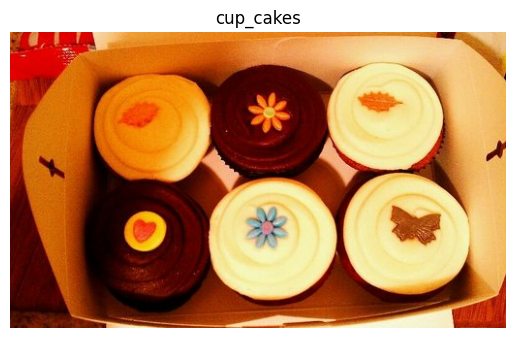

In [ ]:
title = class_names[label.numpy()]

plt.imshow(image)
plt.title(title)
plt.axis('off')

#DATA PREPROCESSING AND EXPLORATORY

In [ ]:
def preprocessing_image(image, label):
    image = tf.image.random_flip_left_right(image)
    # Randomly adjust brightness and contrast
    image = tf.image.random_brightness(image, max_delta=0.6)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    # Randomly rotate the image
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    # Randomly crop and resize the image
    image = tf.image.resize(image, size=[224, 224])
    return tf.cast(image, tf.float32), label

In [ ]:
preprocessed_image = preprocessing_image(image, label)[0]
image_shape = image.shape
image_dtype = image.dtype
preprocessed_image_shape = preprocessed_image.shape
preprocessed_image_dtype = preprocessed_image.dtype
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image_shape},\nDatatype: {image_dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_image[:2]}...,\nShape: {preprocessed_image_shape},\nDatatype: {preprocessed_image_dtype}")

Image before preprocessing:
 [[[199 100  15]
  [192  91   9]
  [202  95  23]
  ...
  [238 196 124]
  [237 195 123]
  [236 194 122]]

 [[210 110  25]
  [207 105  23]
  [194  86  13]
  ...
  [238 196 124]
  [236 194 122]
  [235 193 121]]]...,
Shape: (306, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[255.      159.40625 128.68495]
  [255.      159.58228 128.86383]
  [255.      160.78667 130.3581 ]
  ...
  [255.      254.      246.28572]
  [255.      254.      245.09406]
  [255.      254.      244.45984]]

 [[255.      150.53603 129.05421]
  [255.      151.59502 129.23788]
  [255.      152.26498 129.1234 ]
  ...
  [255.      254.      249.84373]
  [255.      254.      247.6081 ]
  [255.      254.      246.     ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


(-0.5, 223.5, 223.5, -0.5)

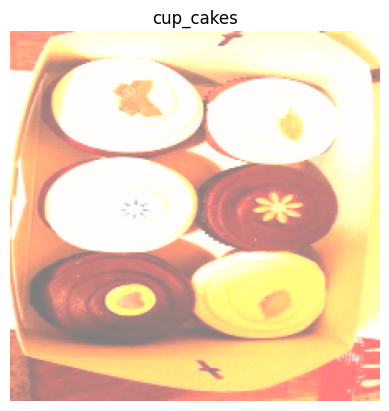

In [ ]:
title = class_names[label]

plt.imshow(preprocessed_image/255.)
plt.title(title)
plt.axis('off')

In [ ]:
buffer_size = 1000
batch_size = 32
autotune = tf.data.AUTOTUNE

In [ ]:
train_data = train_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
train_data = train_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)
validation_data = validation_data.map(map_func=preprocessing_image, num_parallel_calls=autotune)
validation_data = validation_data.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size).prefetch(buffer_size=autotune)

In [ ]:
train_data, validation_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

#Using Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.75):
      print("\nReached more than 75% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
checkpoint_path = "efficientNetB0_model_checkpoints" # save weights in .ckpt
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=1)

#DATA MODELLING

##Creating Base Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers.legacy import Adam

def create_efficientnetB0_model(input_shape=(224, 224, 3)):
    # Load the Efficient Net B0 model pre-trained on ImageNet data
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape)
    base_model.trainable = False
    inputs = layers.Input(shape=input_shape, name="input_layer")
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_efficientnetB0_model()

# Display the model summary
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                           

##Feature Extraction

In [ ]:
callbacks = myCallback()
history_101_food_feature_extraction = model.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_data=validation_data,
                                                validation_steps=int(0.15*len(validation_data)),
                                                callbacks=[callbacks,
                                                           model_checkpoint])

Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 2.3138 - accuracy: 0.4460
Epoch 1: accuracy improved from -inf to 0.44601, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 6941s 3s/step - loss: 2.3138 - accuracy: 0.4460 - val_loss: 1.7425 - val_accuracy: 0.5583
Epoch 2/5
1229/2368 [==============>...............] - ETA: 50:38 - loss: 1.8630 - accuracy: 0.5340

In [ ]:
evaluation_validation_data_of_feature_extraction_model = model.evaluate(validation_data)

790/790 [==============================] - 157s 192ms/step - loss: 1.5384 - accuracy: 0.5991


In [ ]:
evaluation_train_data_of_feature_extraction_model = model.evaluate(train_data)

2368/2368 [==============================] - 472s 197ms/step - loss: 1.5461 - accuracy: 0.6043


In [ ]:
evaluation_validation_data_of_feature_extraction_model

[1.5383902788162231, 0.5991287231445312]

In [ ]:
evaluation_train_data_of_feature_extraction_model

[1.546130895614624, 0.6043300032615662]

##Fine-Tuning Model

In [ ]:
for layer in model.layers:
  layer.trainable=True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "float32">
pooling_layer True float32 <Policy "float32">
dense True float32 <Policy "float32">
softmax_float32 True float32 <Policy "float32">


In [ ]:
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=5,
                                                 verbose=1,
                                                 min_lr=1e-7)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
history_101_food_fine_tuning = model.fit(train_data,
                                         epochs=10,
                                         steps_per_epoch=len(train_data),
                                         validation_data=validation_data,
                                         validation_steps=int(0.15*len(validation_data)),
                                         callbacks=[model_checkpoint,
                                                    callbacks,
                                                    reduce_learning_rate])

Epoch 1/10
2368/2368 [==============================] - ETA: 0s - loss: 1.3170 - accuracy: 0.6579
Epoch 1: accuracy improved from 0.59002 to 0.65791, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 708s 278ms/step - loss: 1.3170 - accuracy: 0.6579 - val_loss: 1.0739 - val_accuracy: 0.7105 - lr: 1.0000e-04
Epoch 2/10
2368/2368 [==============================] - ETA: 0s - loss: 1.0656 - accuracy: 0.7166
Epoch 2: accuracy improved from 0.65791 to 0.71665, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 654s 274ms/step - loss: 1.0656 - accuracy: 0.7166 - val_loss: 1.0046 - val_accuracy: 0.7222 - lr: 1.0000e-04
Epoch 3/10
2368/2368 [==============================] - ETA: 0s - loss: 0.9240 - accuracy: 0.7488
Epoch 3: accuracy improved from 0.71665 to 0.74877, saving model to efficientNetB0_model_checkpoints
2368/2368 [==============================] - 646s 270ms/step - loss: 0.9240 - accuracy: 0.7488 

In [ ]:
evaluation_validation_data_of_fine_tuning_model = model.evaluate(validation_data)

790/790 [==============================] - 153s 187ms/step - loss: 0.9181 - accuracy: 0.7505


In [ ]:
evaluation_validation_data_of_fine_tuning_model

[0.9181321859359741, 0.7504950761795044]

In [ ]:
evaluation_train_data_of_fine_tuning_model = model.evaluate(train_data)

2368/2368 [==============================] - 480s 200ms/step - loss: 0.6746 - accuracy: 0.8155


In [ ]:
evaluation_train_data_of_fine_tuning_model

[0.674613893032074, 0.8154851198196411]

##Showing the plot of model

In [ ]:
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
plot_metrics(history_101_food_feature_extraction)

NameError: ignored

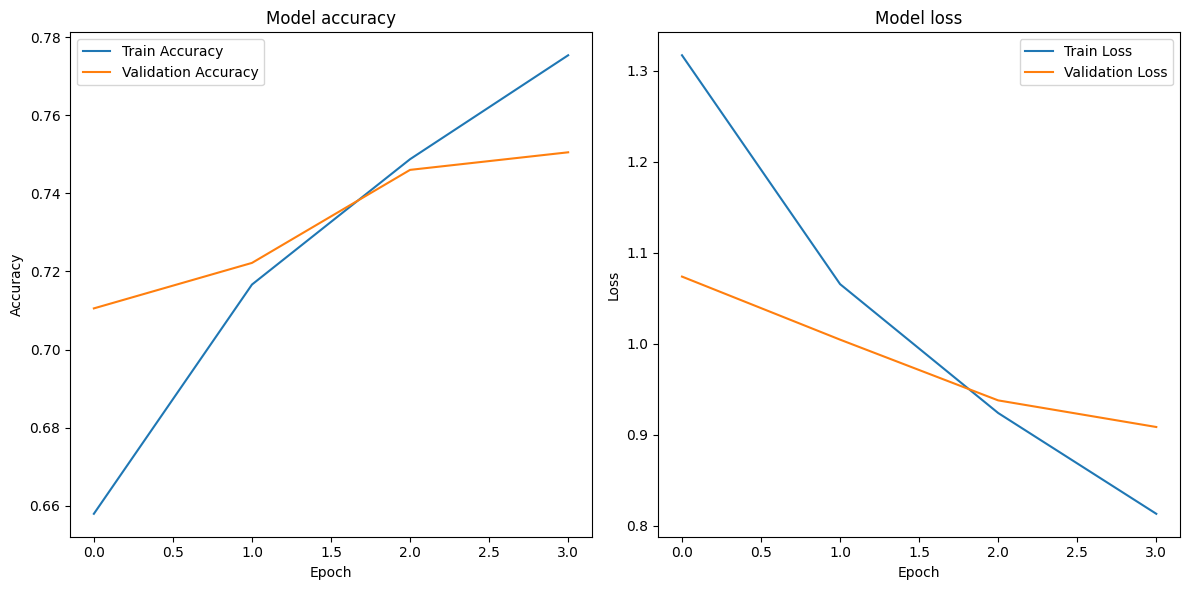

In [ ]:
plot_metrics(history_101_food_fine_tuning)

In [ ]:
model.save('food101_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# SCAN

In [ ]:
# Contoh: Memuat model EfficientNetB0 yang telah dilatih
from tensorflow.keras.applications import EfficientNetB0

model = EfficientNetB0(weights='imagenet')

21834768/21834768 [==============================] - 0s 0us/step


In [ ]:
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.efficientnet import preprocess_input

In [ ]:
# def decode_predictions(predictions):
#     # Misalnya, gunakan decoder dari model ImageNet
#     from tensorflow.keras.applications.imagenet_utils import decode_predictions
#     return decode_predictions(predictions)

In [ ]:
# def scan_food(image_path):
#     # Praproses gambar
#     img_array = preprocess_image(image_path)

#     # Prediksi menggunakan model
#     predictions = model.predict(img_array)

#     # Dekode prediksi menjadi nama kelas
#     decoded_predictions = decode_predictions(predictions)

#     # Tampilkan hasil
#     print(decoded_predictions)

# CSV of Nutritional Info

In [ ]:
url = "https://raw.githubusercontent.com/ivandraap/Nutribalance/main/NutritionValue101.csv"
nutrition_df = pd.read_csv(url, index_col=0, sep=';',encoding='latin-1')
columns_to_delete = ['Unnamed: 6', 'Unnamed: 7']
nutrition_df.drop(columns=columns_to_delete, inplace=True)
print("\nDataFrame:")
nutrition_df


DataFrame:


,name,energy_100g,protein_100g,fat_100g,carbohydrates_100g
0,apple_pie,272.789,2.63,14.04,35.09
1,baby_back_ribs,228.962,18.75,9.82,0.00
2,baklava,429.244,6.64,29.13,37.53
3,beef_carpaccio,200.000,27.10,14.93,0.00
4,beef_tartare,250.000,15.67,13.84,1.56
...,...,...,...,...,...
96,tacos,200.000,10.94,4.69,23.44
97,octopus_balls,200.000,12.30,0.80,0.00
98,tiramisu,283.522,5.91,24.26,29.61
99,tuna_tartare,200.000,15.67,13.84,1.56


In [ ]:
# Example: Load nutrition dataset from a CSV file
nutrition_data = pd.read_csv('nutrition_dataset.csv')

# Example: Merge datasets based on a common column (e.g., food name)
merged_data = pd.merge(image_data, nutrition_data, how='inner', on='common_identifier_column')

# Example: Preprocess integrated data
def preprocess_integration(image, label, nutritional_data):
    # Your preprocessing logic here
    # Resize image, normalize nutritional features, etc.
    return preprocessed_image, label

# Apply preprocessing to the integrated dataset
integrated_data = integrated_data.map(preprocess_integration)

def create_combined_model(input_shape_image=(224, 224, 3), input_shape_nutrition=(num_nutritional_features,)):
    # Load EfficientNetB0 model pre-trained on ImageNet data
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape_image)
    base_model.trainable = False

    # Image input branch
    input_image = layers.Input(shape=input_shape_image, name="input_image")
    x_image = base_model(input_image, training=False)
    x_image = layers.GlobalAveragePooling2D(name="pooling_image")(x_image)

    # Nutrition input branch
    input_nutrition = layers.Input(shape=input_shape_nutrition, name="input_nutrition")
    x_nutrition = layers.Dense(64, activation='relu')(input_nutrition)

    # Combine branches
    combined = layers.concatenate([x_image, x_nutrition])

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[input_image, input_nutrition], outputs=outputs)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

    # Contoh: Melatih model tergabung
    model.fit([dataset_tergabung['images'], dataset_tergabung['nutritional_data']], dataset_tergabung['labels'], epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

    # Contoh: Inferensi pada satu gambar dan tampilkan informasi nutrisi
def predict_and_display(image_path, nutritional_data):
    # Load dan praproses gambar
    image = load_and_preprocess_image(image_path)

    # Lakukan inferensi dengan model
    predictions = model.predict([image, nutritional_data])

    # Tampilkan hasil inferensi dan informasi nutrisi
    print(f"Predicted class: {np.argmax(predictions)}")
    print("Nutritional Information:")
    print(nutritional_data)

# Contoh: Memanggil fungsi untuk satu gambar
predict_and_display('path/to/your/image.jpg', nutritional_data)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt



# Load pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Build the model
inputs = layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Example: Make predictions for a sample image
sample = validation_data.take(1)
for image, label in sample:
    img_array = preprocessed_image(image, label)
    predictions = model.predict(img_array)
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class = ds_info.features["label"].names[predicted_class_index]

    # Display the image
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(predicted_class_cleaned)
    plt.axis("off")
    plt.show()

    # Display the results
    print(f"Predicted Class: {predicted_class_cleaned}")
    print("Nutrition Information:")
    print(nutrition_df.loc[predicted_class_cleaned])

TypeError: ignored

##Save and Download The Model

In [ ]:
model.save('food101_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('food101_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('/content/drive/MyDrive/MyFolder/myModel', save_format="h5")

#Citation

In [ ]:
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}